## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv')
df.columns = ['DATE', 'TAG', 'POSTS']

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
print(df.head())
df.tail()

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    163
3  2008-08-01 00:00:00           c     84
4  2008-08-01 00:00:00      python    124


,DATE,TAG,POSTS
2155,2021-07-01 00:00:00,r,4760
2156,2021-07-01 00:00:00,ruby,507
2157,2021-07-01 00:00:00,javascript,17859
2158,2021-07-01 00:00:00,swift,2338
2159,2021-07-01 00:00:00,python,24940


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(2160, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

DATE     2160
TAG      2160
POSTS    2160
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
print(df.groupby('TAG').sum())
df.groupby('TAG').sum().idxmax()

              POSTS
TAG                
assembly      38277
c            362148
c#          1489031
c++          731980
delphi        48323
go            54968
java        1787564
javascript  2246092
perl          65741
php         1408059
python      1762462
r            412318
ruby         220245
swift        299245


POSTS    javascript
dtype: object

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [14]:
print(df.groupby('TAG').count())
df.groupby('TAG').count().sort_values('DATE')

            DATE  POSTS
TAG                    
assembly     156    156
c            156    156
c#           157    157
c++          156    156
delphi       156    156
go           141    141
java         156    156
javascript   156    156
perl         156    156
php          156    156
python       156    156
r            154    154
ruby         156    156
swift        148    148


,DATE,POSTS
TAG,,
go,141,141
swift,148,148
r,154,154
assembly,156,156
c,156,156
c++,156,156
delphi,156,156
java,156,156
javascript,156,156


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [18]:
df["DATE"][1]

'2008-08-01 00:00:00'

In [19]:
type(df["DATE"][1])

str

In [20]:
df["DATE"] = pd.to_datetime(df["DATE"])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,84
4,2008-08-01,python,124


## Data Manipulation



In [28]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,84.0,508.0,164.0,14.0,NaN,222.0,163.0,28.0,161.0,124.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,341.0,2662.0,7337.0,4744.0,270.0,827.0,10460.0,19862.0,154.0,5597.0,28253.0,6090.0,569.0,2910.0
2021-04-01,345.0,2467.0,6786.0,4362.0,186.0,687.0,9537.0,18725.0,143.0,5140.0,26632.0,5622.0,607.0,2536.0
2021-05-01,326.0,2272.0,6589.0,4613.0,179.0,701.0,9734.0,18523.0,123.0,5114.0,26189.0,5413.0,448.0,2217.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [29]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

TAG
assembly      156
c             156
c#            157
c++           156
delphi        156
go            141
java          156
javascript    156
perl          156
php           156
python        156
r             154
ruby          156
swift         148
dtype: int64

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [31]:
reshaped_df.count()

TAG
assembly      156
c             156
c#            157
c++           156
delphi        156
go            141
java          156
javascript    156
perl          156
php           156
python        156
r             154
ruby          156
swift         148
dtype: int64

In [34]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,84.0,508.0,164.0,14.0,0.0,222.0,163.0,28.0,161.0,124.0,0.0,71.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1989.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,503.0,452.0,1.0,159.0,0.0


In [35]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

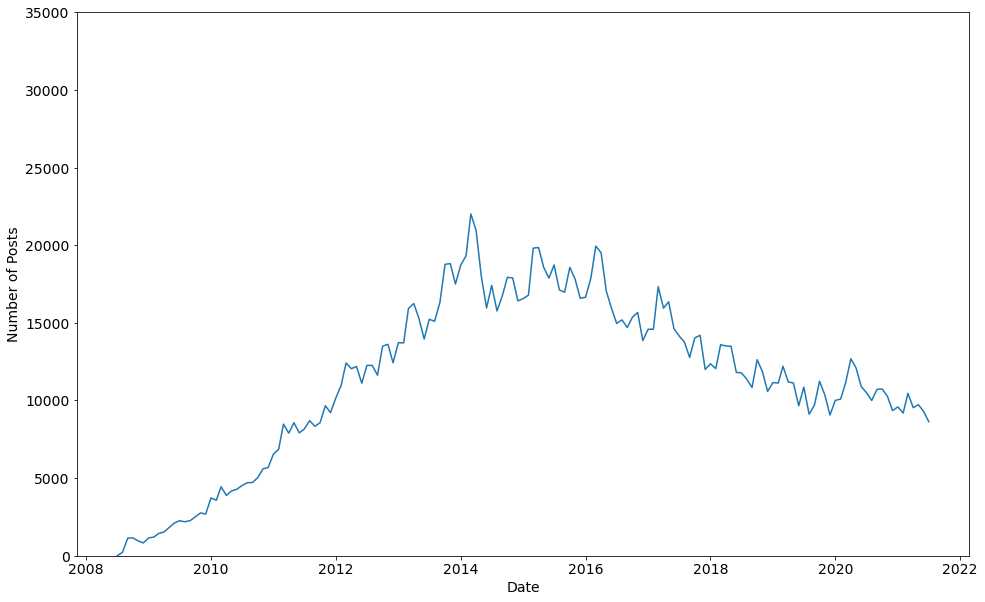

In [45]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java']) 

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

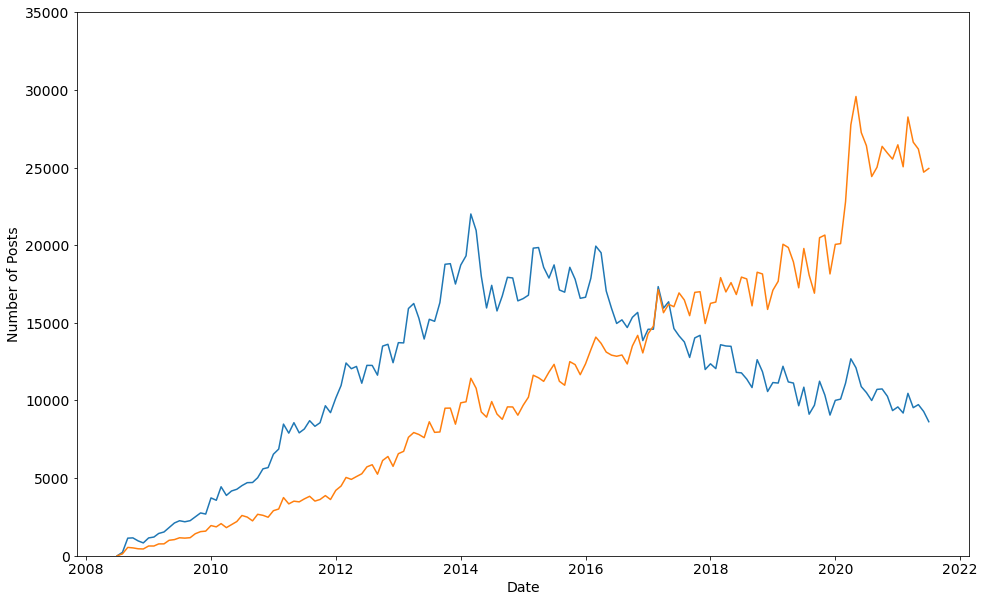

In [49]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java']) 
plt.plot(reshaped_df.index, reshaped_df['python']) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one observation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

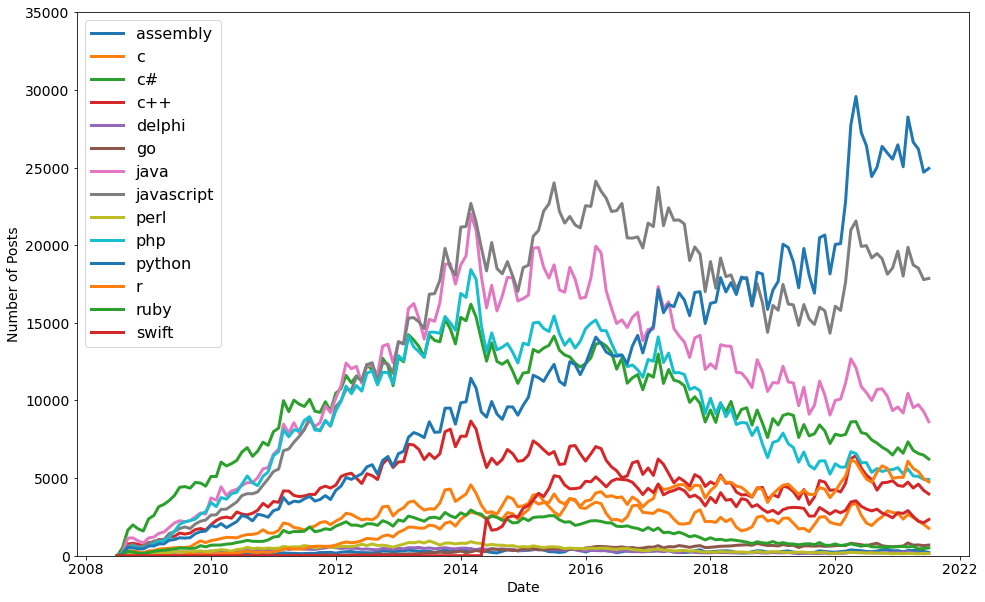

In [52]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

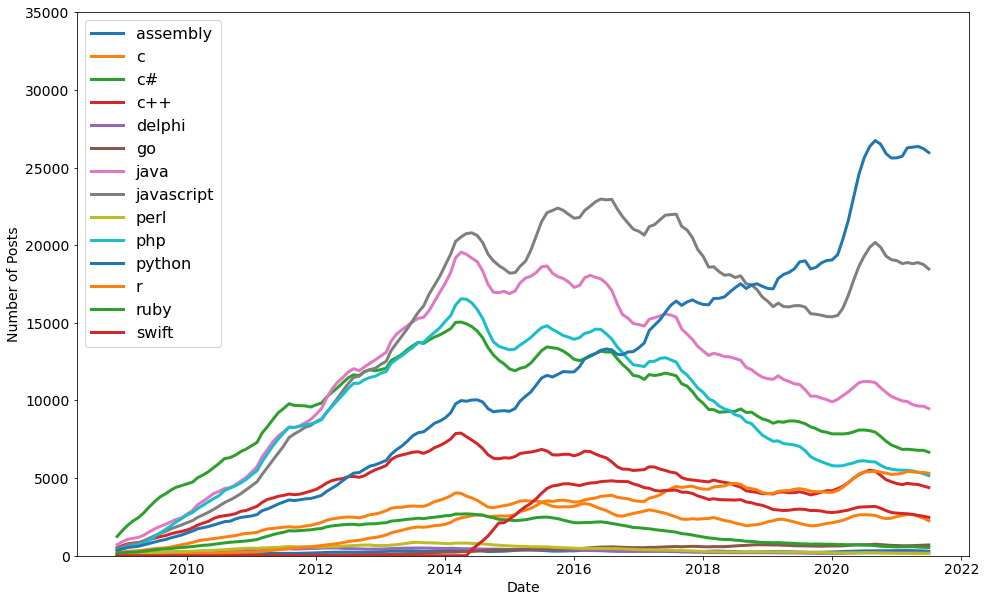

In [53]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

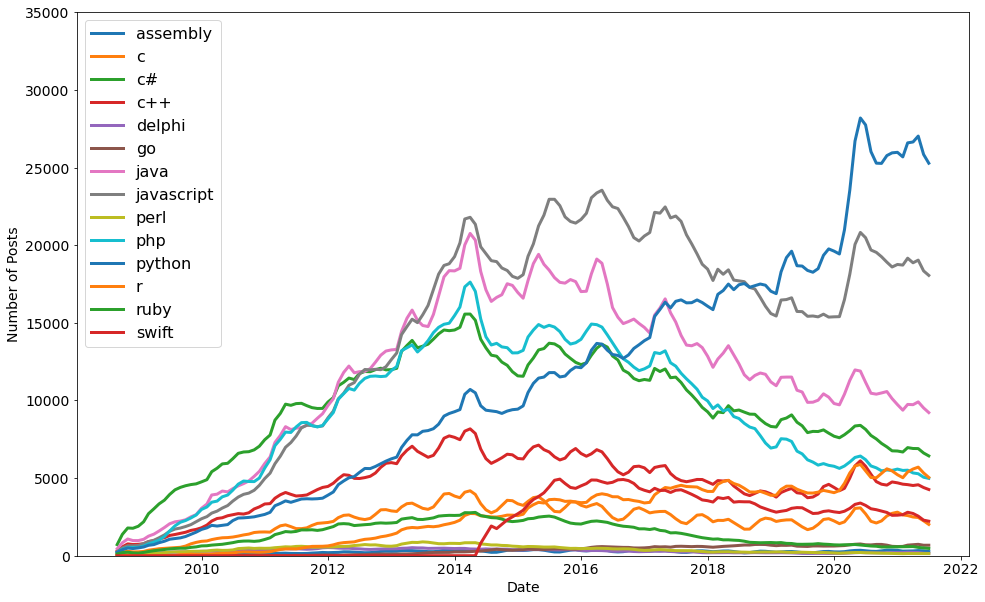

In [54]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

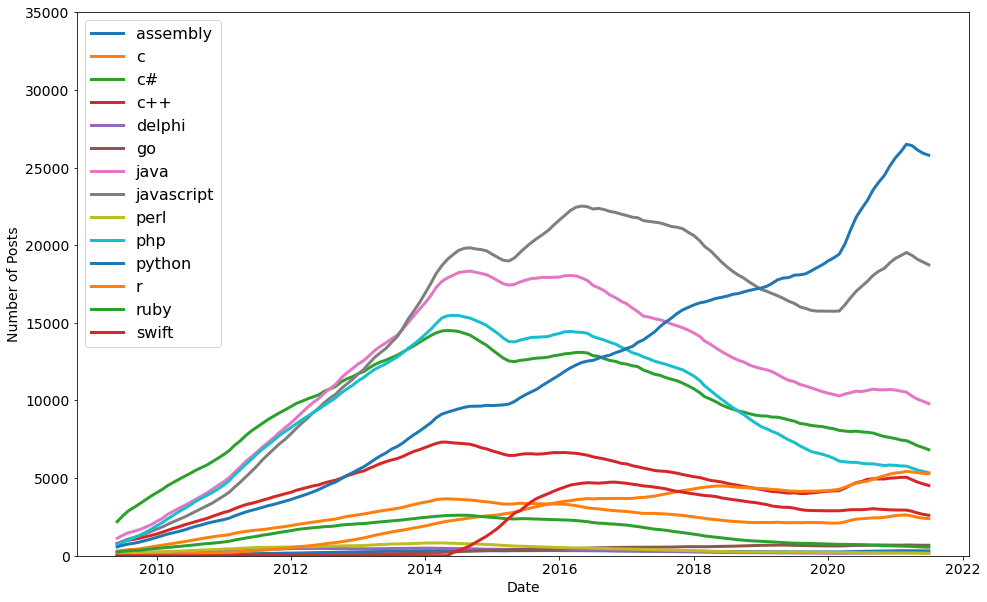

In [55]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)